In [51]:
import bs4 as bs
import pickle
import requests
import functools

import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web

import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
from collections import Counter


from sklearn import linear_model
from sklearn.metrics import mean_squared_error
style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

           MMM       ABT      ABBV       ACN      ATVI       AYI      ADBE  \
MMM   1.000000  0.948820  0.917590  0.966734  0.926825  0.962077  0.931914   
ABT   0.948820  1.000000  0.870608  0.960316  0.889755  0.898102  0.877691   
ABBV  0.917590  0.870608  1.000000  0.782810  0.740370  0.831226  0.868343   
ACN   0.966734  0.960316  0.782810  1.000000  0.939226  0.959037  0.924770   
ATVI  0.926825  0.889755  0.740370  0.939226  1.000000  0.966880  0.939486   

           AMD       AAP       AES    ...         WYNN       XEL       XRX  \
MMM  -0.517673  0.967155 -0.281598    ...     0.682478  0.942228  0.074603   
ABT  -0.601488  0.958861 -0.247557    ...     0.757662  0.946774 -0.013938   
ABBV  0.188658  0.896813  0.056811    ...    -0.299059  0.786756  0.450472   
ACN  -0.511405  0.963566  0.040392    ...     0.683490  0.980613  0.065748   
ATVI -0.525573  0.908455 -0.256727    ...     0.528329  0.926868  0.008400   

          XLNX        XL       XYL       YUM       ZBH      ZI

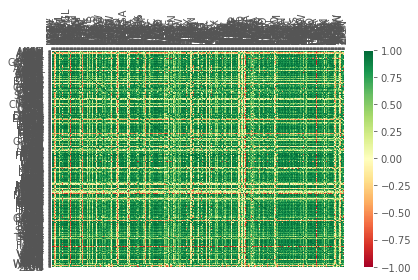

In [133]:
def visualize_data(df=pd.read_csv('sp500_joined_closes.csv')):
    
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    plt.show()
    
visualize_data()

In [4]:
# Prepare data for training

def prepare_data(ticker):
    hm_days = 30
    df = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    
    data = df[ticker]
    data = data.dropna(how='any').values
    num = data.shape[0]
    
    X = np.empty((0, hm_days), int)
    Y = np.array([])
      
    for i in range(num - hm_days - 1):
        X = np.vstack((X, data[i:i+hm_days]))
        Y = np.append(Y, data[i+hm_days])
    return X, Y

def split(ticker):
    
    X, Y = prepare_data(ticker)

    # Dimensions of dataset
    n = X.shape[0]
    p = X.shape[1]

    # Training and test data
    train_start = 0
    train_end = int(np.floor(0.8*n))
    test_start = train_end
    test_end = n

    X_train = X[np.arange(train_start, train_end)]
    y_train = Y[np.arange(train_start, train_end)]
    X_test = X[np.arange(test_start, test_end)]
    y_test = Y[np.arange(test_start, test_end)]
    
    return X_train, y_train, X_test, y_test

In [11]:
def do_ml(ticker):
        
    X_train, y_train, X_test, y_test = split(ticker)

    clf = linear_model.LinearRegression()

    clf.fit(X_train, y_train)
#     print(X_train.shape)
#     print(X_train.min(), X_train.max())
#     print(y_train.shape)
#     print(y_train.min(), y_train.max())
#     print("")
        
    predictions = clf.predict(X_test)
#     print(predictions.shape)
#     print(predictions.min(), predictions.max())
#     print(np.unique(predictions).shape)
#     print("")
    
    confidence = mean_squared_error(y_test, predictions)    
#     print('Accuracy', confidence)
    
    return clf

    
do_ml('T')
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
def show(y_test1, y_test2, ticker):
    plt.ion()
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    line1, = ax1.plot(y_test2)
    line2, = ax1.plot(y_test1)
#     plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
    file_name = os.getcwd() + '/img/' + ticker + '.jpg'
    plt.savefig(file_name)

#     plt.show()
    

116.04316494106078

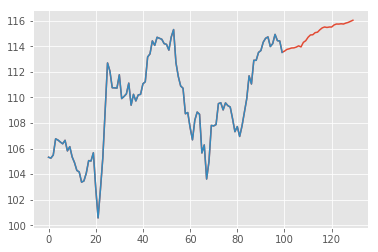

In [179]:
def predict(ticker):
    df = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    data = df[ticker]
    data = data.dropna(how='any').values
    
    old = data
    
    clf = do_ml(ticker)
    
    f_horizon = 30
    
    for i in range(f_horizon):
        X = data[-30:].reshape(-1, 30)
        pred = clf.predict(X)
#         print(pred)
        data = np.append(data, [pred])
    show(old[-100:], data[-(100+f_horizon):], ticker)
    
    return data[-1]
    
predict('AAPL')


['AMD', 'NVDA', 'DXC', 'AMAT', 'PWR', 'NEM', 'OKE', 'HII', 'ALB', 'DHR', 'CMA', 'CHTR', 'RF', 'IDXX', 'ULTA', 'FMC', 'ZION', 'CFG', 'SYMC', 'GRMN', 'MLM', 'FITB', 'CBS', 'DGX', 'LRCX', 'HP', 'JEC', 'URI', 'GLW', 'NUE', 'ALGN', 'ADSK', 'UNH', 'HAL', 'CNP', 'DLR', 'PH', 'KEY', 'APA', 'MTD', 'XYL', 'JPM', 'ITW', 'AVGO', 'NSC', 'HPE', 'HRS', 'WM', 'CVX', 'BAC', 'IR', 'LLL', 'MGM', 'RSG', 'MCHP', 'STI', 'TWX', 'UNM', 'CAT', 'SYY', 'CME', 'CINF', 'ROST', 'VMC', 'SCG', 'LNT', 'FLIR', 'MS', 'DE', 'PKG', 'T', 'XLNX', 'RJF', 'NTRS', 'NOC', 'DRE', 'PRU', 'WYNN', 'TSN', 'DRI', 'AOS', 'GS', 'PNC', 'MTB', 'SCHW', 'PXD', 'CSX', 'BBT', 'DFS', 'LNC', 'ETN', 'BSX', 'ABBV', 'SYK', 'AWK', 'NAVI', 'L', 'ROK', 'SNI', 'WHR', 'PLD', 'ARE', 'TXN', 'BBY', 'IP', 'CAG', 'MU', 'ZTS', 'BAX', 'APH', 'ISRG', 'CTAS', 'CMI', 'TMK', 'HOG', 'JCI', 'JBHT', 'AMZN', 'KLAC', 'TDG', 'EW', 'MMC', 'FAST', 'EXC', 'AEE', 'TXT', 'EQIX', 'RE', 'A', 'PBCT', 'USB', 'AJG', 'YUM', 'PNW', 'RTN', 'PCAR', 'NFLX', 'DLTR', 'DTE', 'ALL', 'WM

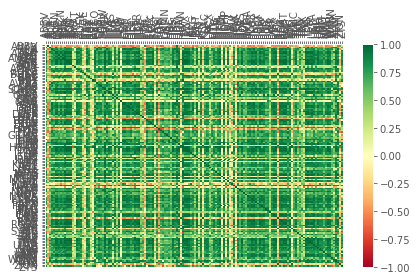

In [152]:
def chooseTop150():
    
    def mykey(a):
        a = df[a].dropna(how='any').values
        prev = min(len(a), 300)
        diff = a[-1] / a[-prev]
        return diff

    df = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    
    companies = list(df)
    companies.sort(key=mykey)
    companies.reverse()

    top = companies[:150]
    ignore = companies[150:]
        
    print(top)
#     print(ignore)
    
    df = df.drop(ignore, axis=1)
    
    return df
            
# chooseTop150()
visualize_data(chooseTop150())

In [166]:
def getIndependentCompanies(num=10):
    df = chooseTop150()
#     df.fillna(0, inplace = True)
    
    df_corr = df.corr()
    data_corr = df_corr.values
    
    change = []
    for a in list(df):
        a = df[a].dropna(how='any').values
        prev = min(len(a), 300)
        diff = a[-1] / a[-prev]
        change.append(diff)


    companyNum = len(list(df))
    pair = sorted(zip(change, range(companyNum)), 
                  key=lambda x: x[0], reverse=True)

    tickers = []
    
    connected = np.zeros(companyNum)
    thres = 0.6
    for p in pair:
        i = p[1]
        cnt = 0
        if connected[i]:
            continue
        connected[i] = 1
        tickers.append(df.columns.values[i])

        for j in range(companyNum):
            if i == j:
                continue
            if data_corr[i][j] > thres:
#                 print(data_corr[i][j])
                connected[j] = 1
                cnt += 1
#         print(cnt)
        
    print(tickers)

    return tickers
    
    
getIndependentCompanies()

['AMD', 'NVDA', 'DXC', 'AMAT', 'PWR', 'NEM', 'OKE', 'HII', 'ALB', 'DHR', 'CMA', 'CHTR', 'RF', 'IDXX', 'ULTA', 'FMC', 'ZION', 'CFG', 'SYMC', 'GRMN', 'MLM', 'FITB', 'CBS', 'DGX', 'LRCX', 'HP', 'JEC', 'URI', 'GLW', 'NUE', 'ALGN', 'ADSK', 'UNH', 'HAL', 'CNP', 'DLR', 'PH', 'KEY', 'APA', 'MTD', 'XYL', 'JPM', 'ITW', 'AVGO', 'NSC', 'HPE', 'HRS', 'WM', 'CVX', 'BAC', 'IR', 'LLL', 'MGM', 'RSG', 'MCHP', 'STI', 'TWX', 'UNM', 'CAT', 'SYY', 'CME', 'CINF', 'ROST', 'VMC', 'SCG', 'LNT', 'FLIR', 'MS', 'DE', 'PKG', 'T', 'XLNX', 'RJF', 'NTRS', 'NOC', 'DRE', 'PRU', 'WYNN', 'TSN', 'DRI', 'AOS', 'GS', 'PNC', 'MTB', 'SCHW', 'PXD', 'CSX', 'BBT', 'DFS', 'LNC', 'ETN', 'BSX', 'ABBV', 'SYK', 'AWK', 'NAVI', 'L', 'ROK', 'SNI', 'WHR', 'PLD', 'ARE', 'TXN', 'BBY', 'IP', 'CAG', 'MU', 'ZTS', 'BAX', 'APH', 'ISRG', 'CTAS', 'CMI', 'TMK', 'HOG', 'JCI', 'JBHT', 'AMZN', 'KLAC', 'TDG', 'EW', 'MMC', 'FAST', 'EXC', 'AEE', 'TXT', 'EQIX', 'RE', 'A', 'PBCT', 'USB', 'AJG', 'YUM', 'PNW', 'RTN', 'PCAR', 'NFLX', 'DLTR', 'DTE', 'ALL', 'WM

['AMD', 'NVDA', 'AMAT', 'PWR', 'NEM', 'OKE', 'CMA', 'RF', 'JEC', 'BBY']

['AMD', 'NVDA', 'DXC', 'AMAT', 'PWR', 'NEM', 'OKE', 'HII', 'ALB', 'DHR', 'CMA', 'CHTR', 'RF', 'IDXX', 'ULTA', 'FMC', 'ZION', 'CFG', 'SYMC', 'GRMN', 'MLM', 'FITB', 'CBS', 'DGX', 'LRCX', 'HP', 'JEC', 'URI', 'GLW', 'NUE', 'ALGN', 'ADSK', 'UNH', 'HAL', 'CNP', 'DLR', 'PH', 'KEY', 'APA', 'MTD', 'XYL', 'JPM', 'ITW', 'AVGO', 'NSC', 'HPE', 'HRS', 'WM', 'CVX', 'BAC', 'IR', 'LLL', 'MGM', 'RSG', 'MCHP', 'STI', 'TWX', 'UNM', 'CAT', 'SYY', 'CME', 'CINF', 'ROST', 'VMC', 'SCG', 'LNT', 'FLIR', 'MS', 'DE', 'PKG', 'T', 'XLNX', 'RJF', 'NTRS', 'NOC', 'DRE', 'PRU', 'WYNN', 'TSN', 'DRI', 'AOS', 'GS', 'PNC', 'MTB', 'SCHW', 'PXD', 'CSX', 'BBT', 'DFS', 'LNC', 'ETN', 'BSX', 'ABBV', 'SYK', 'AWK', 'NAVI', 'L', 'ROK', 'SNI', 'WHR', 'PLD', 'ARE', 'TXN', 'BBY', 'IP', 'CAG', 'MU', 'ZTS', 'BAX', 'APH', 'ISRG', 'CTAS', 'CMI', 'TMK', 'HOG', 'JCI', 'JBHT', 'AMZN', 'KLAC', 'TDG', 'EW', 'MMC', 'FAST', 'EXC', 'AEE', 'TXT', 'EQIX', 'RE', 'A', 'PBCT', 'USB', 'AJG', 'YUM', 'PNW', 'RTN', 'PCAR', 'NFLX', 'DLTR', 'DTE', 'ALL', 'WM

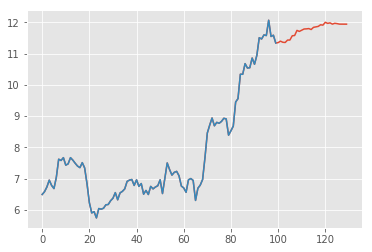

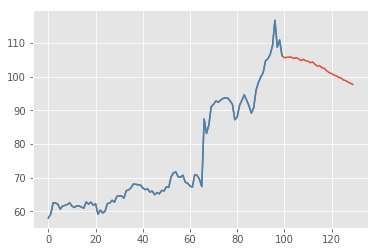

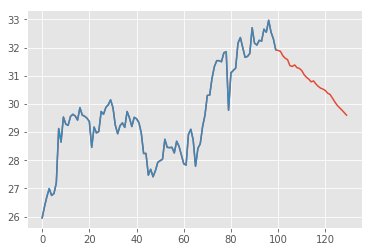

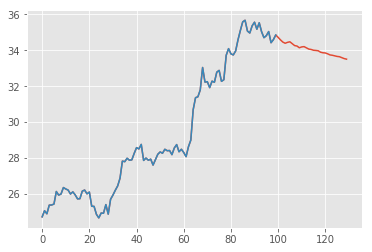

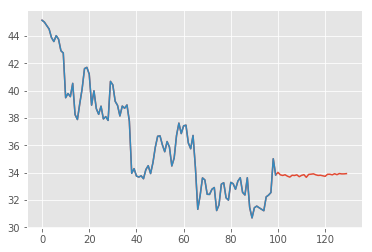

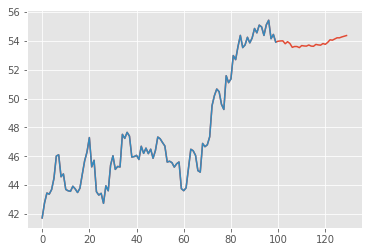

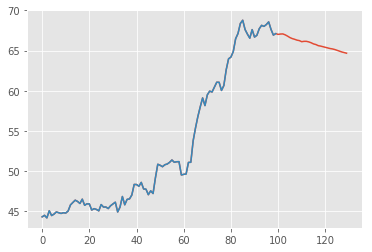

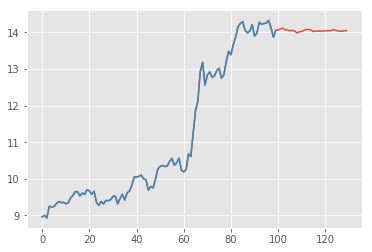

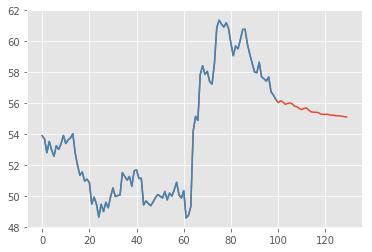

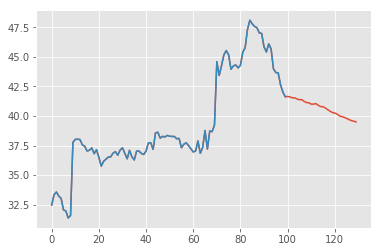

In [180]:
def predictCompanies():

    df = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = getIndependentCompanies()
    
    for ticker in tickers:
        data = df[ticker]
        data = data.dropna(how='any').values
        
        prev = data[-1]
        new = predict(ticker)
        print((new / prev * 100) - 100)
        
predictCompanies()
        
        
    